In [66]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load Dataset

In [67]:
# load dataset
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [68]:
# reshape data
X_train = X_train.reshape(X_train.shape[0], 100, 100, 3)
Y_train = Y_train.reshape(Y_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 100, 100, 3)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

# normalize data
X_train /= 255
X_test /= 255

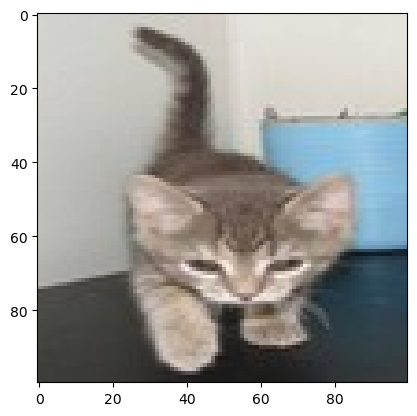

In [69]:
idx = random.randint(0, X_train.shape[0])
plt.imshow(X_train[idx, :])
plt.show()

In [70]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


# Model

In [79]:
# layers will be stacked up in this sequence (convolution, max-pooling, fully-connected)
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'), # dense means fully connected layers
    Dense(1, activation = 'sigmoid')
])

In [80]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [83]:
model.fit( X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9434 - loss: 0.1923
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9465 - loss: 0.1715
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9582 - loss: 0.1278
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9780 - loss: 0.0849
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9882 - loss: 0.0561


# Evaluate performance on Test Dataset

In [84]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6120 - loss: 1.4119


[1.0784393548965454, 0.6800000071525574]

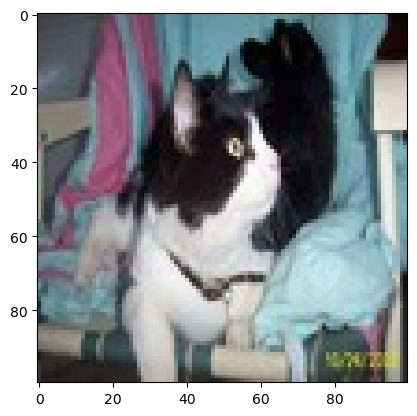

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.11910002]]
Model predicts  dog


In [110]:
idx2 = random.randint(0, Y_test.shape[0])
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))

print(y_pred)

if(y_pred <= 0.5):
    pred = 'dog'
else:
    pred = 'cat'

print('Model predicts ', pred)